In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import warnings
warnings.filterwarnings('ignore')


In [5]:
#Load the Datasets
# Replace these file paths with your local paths or keep all 3 in the same folder
import pandas as pd

#Load dataset 
history_df = pd.read_csv('TCS_stock_history.csv')
action_df = pd.read_csv('TCS_stock_action.csv')
info_df = pd.read_csv('TCS_stock_info.csv')

# Display first 5 rows of each
print("History Data:")
display(history_df.head())
print("\nAction Data:")
display(action_df.head())
print("\nInfo Data:")
display(info_df.head())

History Data:


Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2  2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3  2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4  2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0


Action Data:


Date  Dividends  Stock Splits
0  2004-10-28     0.3750           0.0
1  2005-02-03     0.4375           0.0
2  2005-07-06     0.6250           0.0
3  2005-08-18     0.3750           0.0
4  2005-10-18     0.3750           0.0


Info Data:


zip                                             400001
0               sector                                         Technology
1    fullTimeEmployees                                             509058
2  longBusinessSummary  Tata Consultancy Services Limited provides inf...
3                 city                                             Mumbai
4                phone                                    91 22 6778 9999

In [6]:
# Basic info
print(history_df.info())
print(history_df.describe())

print(action_df.info())
print(action_df.head())

print(info_df.info())
print(info_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB
None
              Open         High          Low        Close        Volume  \
count  4463.000000  4463.000000  4463.000000  4463.000000  4.463000e+03   
mean    866.936239   876.675013   856.653850   866.537398  3.537876e+06   
std     829.905368   838.267104   821.233477   829.611313  3.273531e+06   
min      24.146938    27.102587    24.146938    26.377609  0.000000e+00   
25%     188.951782  

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [33]:
df.describe()

Open         High          Low        Close        Volume  \
count  4463.000000  4463.000000  4463.000000  4463.000000  4.463000e+03   
mean    866.936239   876.675013   856.653850   866.537398  3.537876e+06   
std     829.905368   838.267104   821.233477   829.611313  3.273531e+06   
min      24.146938    27.102587    24.146938    26.377609  0.000000e+00   
25%     188.951782   191.571816   185.979417   188.594620  1.860959e+06   
50%     530.907530   534.751639   525.616849   529.713257  2.757742e+06   
75%    1156.462421  1165.815854  1143.622800  1154.784851  4.278625e+06   
max    3930.000000  3981.750000  3892.100098  3954.550049  8.806715e+07   

         Dividends  Stock Splits  
count  4463.000000   4463.000000  
mean      0.071533      0.001344  
std       0.965401      0.051842  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max      40.000000      2.000000

In [38]:
print(history.dtypes)      # Check data types of all columns
print(history.select_dtypes(include='number').head())  # Show only numeric columns


history['Date'] = pd.to_datetime(history['Date'])
numeric_df = history.select_dtypes(include='number')
corel = numeric_df.corr()


Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
        Open       High        Low      Close  Volume  Dividends  Stock Splits
0  28.794172  29.742206  28.794172  29.519140  212976        0.0           0.0
1  29.556316  30.030333  28.905705  29.119476  153576        0.0           0.0
2  29.184536  29.184536  26.563503  27.111877  822776        0.0           0.0
3  27.111877  27.111877  27.111877  27.111877       0        0.0           0.0
4  26.972458  28.255089  26.582090  27.046812  811856        0.0           0.0


In [85]:
#Clean and Prepare the history Dataset

history['Date'] = pd.to_datetime(history['Date'])
numeric_df = history.select_dtypes(include='number')
corel = numeric_df.corr()
for col in history.columns:
    history[col] = pd.to_numeric(history[col], errors='ignore')

numeric_df = history.select_dtypes(include='number')
corel = numeric_df.corr()



In [39]:
numeric_data = data.select_dtypes(include=['number'])  # Optional step
corel = numeric_data.corr()                            # Correct way
print(corel)


data_cleaned = data.dropna()
print(corel)

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


         Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2  2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3  2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4  2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999888  0.999892  0.999787 -0.153362   0.059743   
High          0.999888  1.000000  0.999867  0.999914 -0.150918   0.060044   
Low           0.999892  0.999867  1.000000  0.999901 -0.154962   0.059916   
Close         0.999787  0.999914  0.999901  1.000000 -0.152844   0.060179   
Volume       -0.153362 -0.

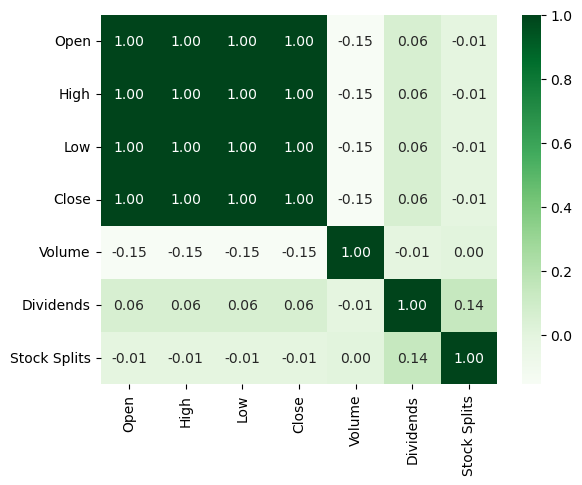

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

history = pd.read_csv("TCS_stock_history.csv")
print(history.head())

# Convert date column to datetime if needed (optional)
history['Date'] = pd.to_datetime(history['Date'])

# Select only numeric columns for correlation
numeric_df = history.select_dtypes(include='number')

corel = numeric_df.corr()
print(corel)

sns.heatmap(corel, annot=True, cmap="Greens", fmt=".2f")
plt.show()


In [13]:
history['Date'] = pd.to_datetime(history['Date'])
history.sort_values(by='Date', inplace=True)

# Check for nulls
print(history.isnull().sum())

# Convert numeric columns (in case of data errors)
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
for col in cols:
    history[col] = pd.to_numeric(history[col], errors='coerce')

# Fill nulls with forward-fill
history.fillna(method='ffill', inplace=True)
history.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
MA50            0
MA200           0
Year            0
Month           0
Day             0
Day_of_Week     0
Prev_Close      0
dtype: int64


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
MA50            0
MA200           0
Year            0
Month           0
Day             0
Day_of_Week     0
Prev_Close      0
dtype: int64

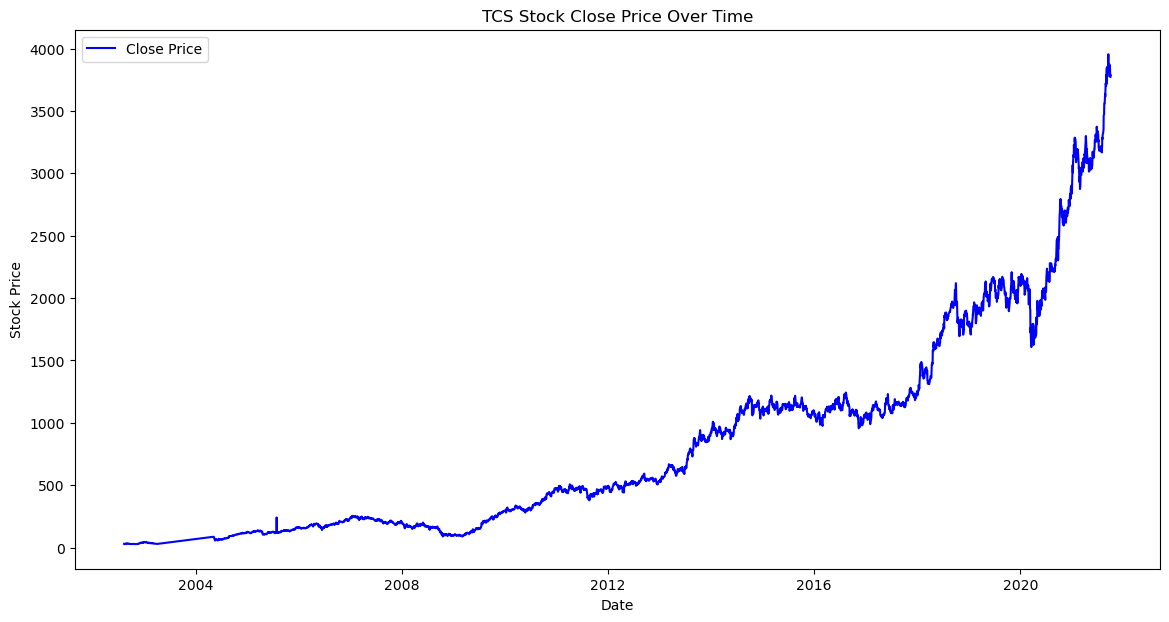

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(history['Date'], history['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()


In [17]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
         Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2  2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3  2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4  2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


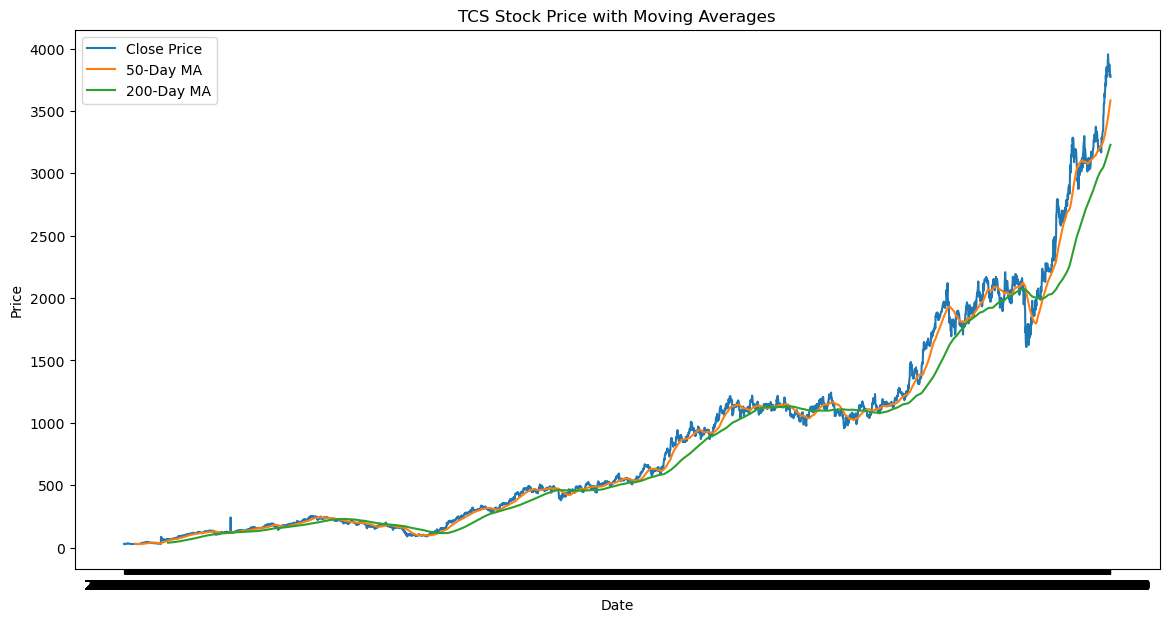

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Example: Load historical stock data
history = pd.read_csv("TCS_stock_history.csv")  # Replace with your actual data source
print(history.columns)
print(history.head())

history['MA50'] = history['Close'].rolling(window=50).mean()
history['MA200'] = history['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(history['Date'], history['Close'], label='Close Price')
plt.plot(history['Date'], history['MA50'], label='50-Day MA')
plt.plot(history['Date'], history['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()


In [7]:
history['Year'] = history['Date'].dt.year
history['Month'] = history['Date'].dt.month
history['Day'] = history['Date'].dt.day
history['Day_of_Week'] = history['Date'].dt.dayofweek
history['Prev_Close'] = history['Close'].shift(1)
history.dropna(inplace=True)  # remove rows with NaN after shifting


In [8]:
features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']
X = history[features]
y = history['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MSE: 46.322414284879535
R^2 Score: 0.9999332979879461


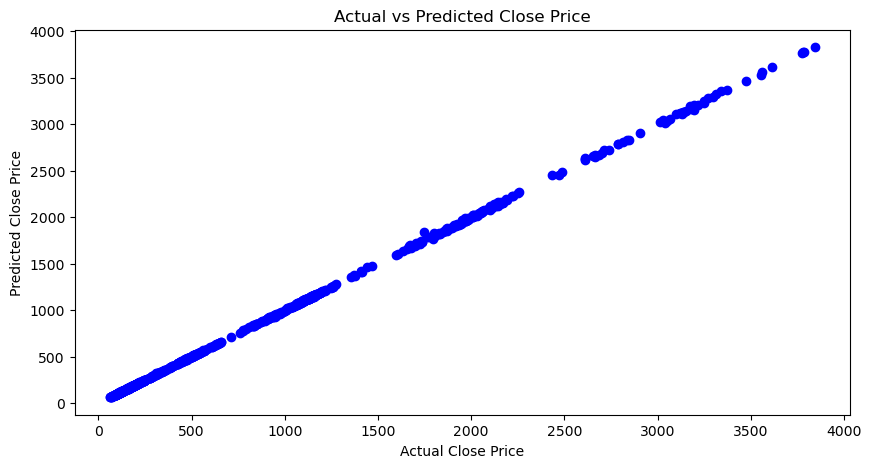

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()


In [10]:
# Datasets (action and info) These can be used for:

#Comparing current action vs historical data

#Adding company-related information as features

# Enhancing visualizations But for the core prediction model, TCS_stock_history.csv is sufficient.

In [12]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)


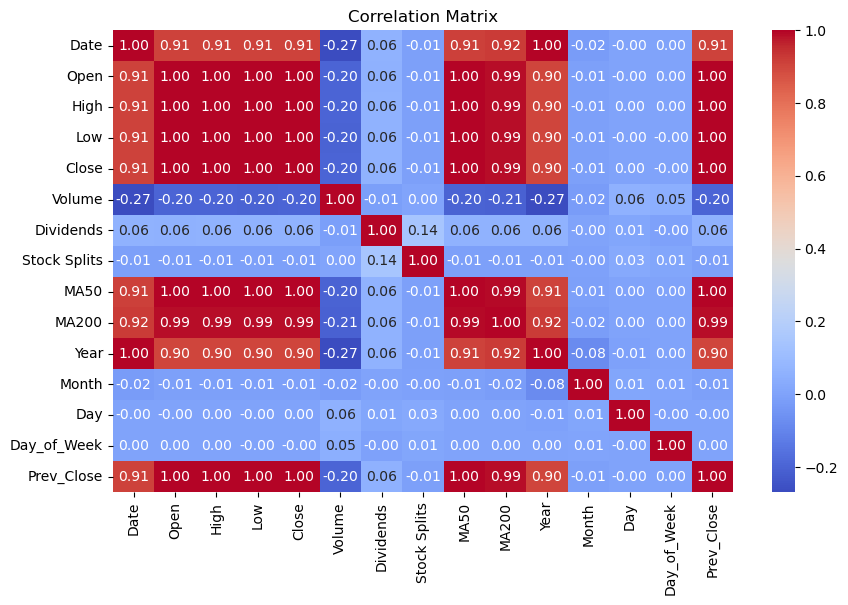

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(history.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


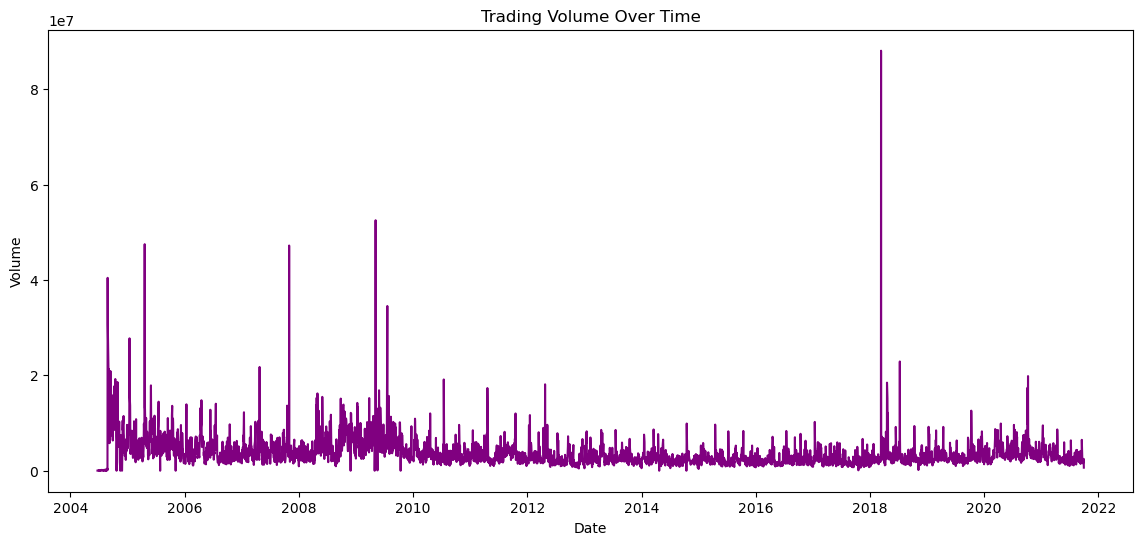

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(history['Date'], history['Volume'], color='purple')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


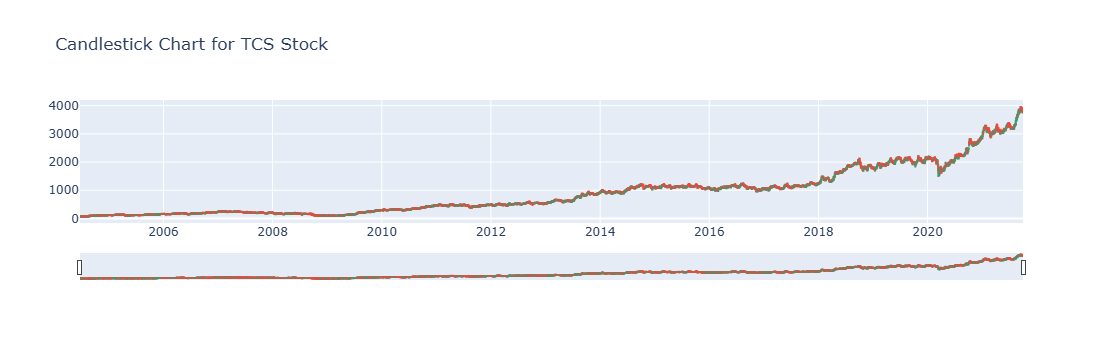

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=history['Date'],
                open=history['Open'],
                high=history['High'],
                low=history['Low'],
                close=history['Close'])])

fig.update_layout(title='Candlestick Chart for TCS Stock')
fig.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("RF MSE:", mean_squared_error(y_test, rf_pred))
print("RF R2:", r2_score(y_test, rf_pred))


RF MSE: 95.07915843141991
RF R2: 0.999863090659896


In [22]:
!pip install xgboost 


In [23]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("XGBoost R2:", r2_score(y_test, xgb_pred))

XGBoost MSE: 307.4793330790048
XGBoost R2: 0.9995572447917928


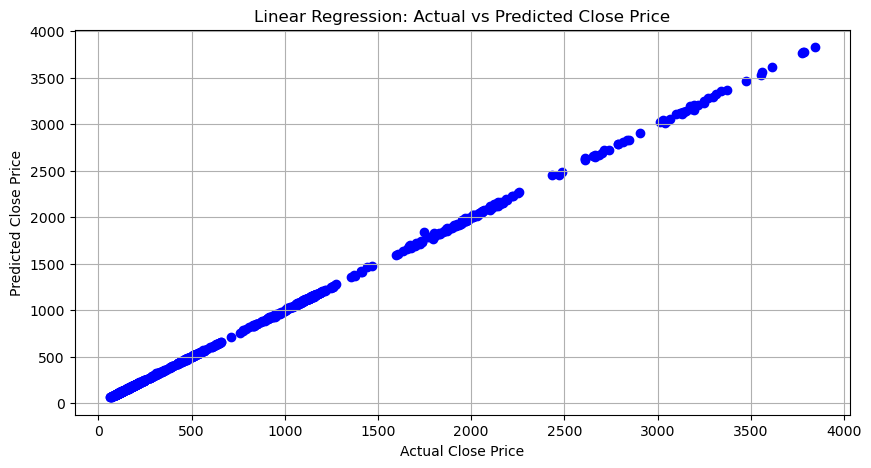

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression: Actual vs Predicted Close Price')
plt.grid(True)
plt.show()


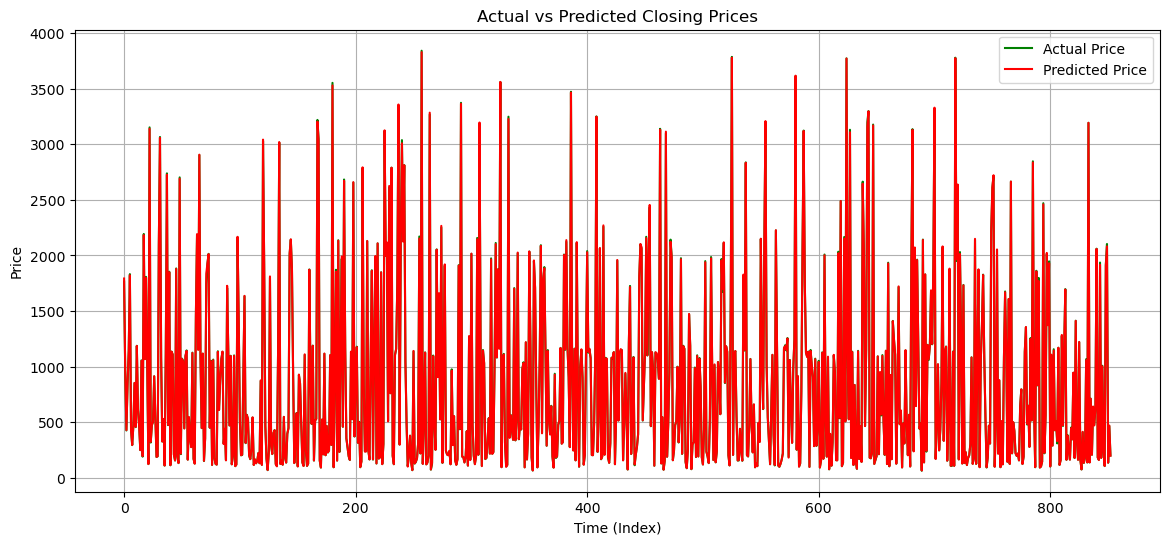

In [25]:
# Create a DataFrame to compare
compare_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
compare_df = compare_df.reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.plot(compare_df['Actual'], label='Actual Price', color='green')
plt.plot(compare_df['Predicted'], label='Predicted Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


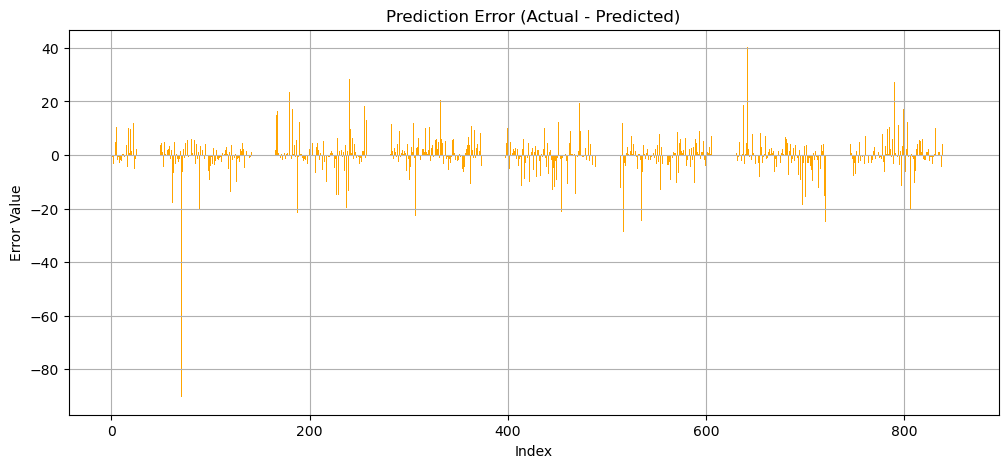

In [27]:
error = y_test.values - y_pred
plt.figure(figsize=(12, 5))
plt.bar(range(len(error)), error, color='orange')
plt.title('Prediction Error (Actual - Predicted)')
plt.xlabel('Index')
plt.ylabel('Error Value')
plt.grid(True)
plt.show()


In [56]:

# Correlation of features with the target variable (Close Price)
correlation_with_close = history.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


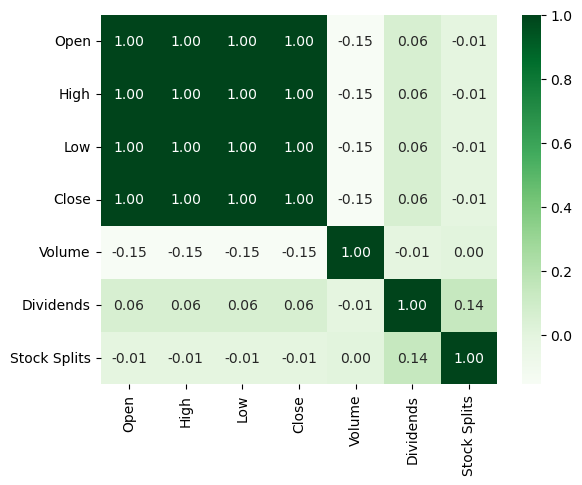

In [57]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

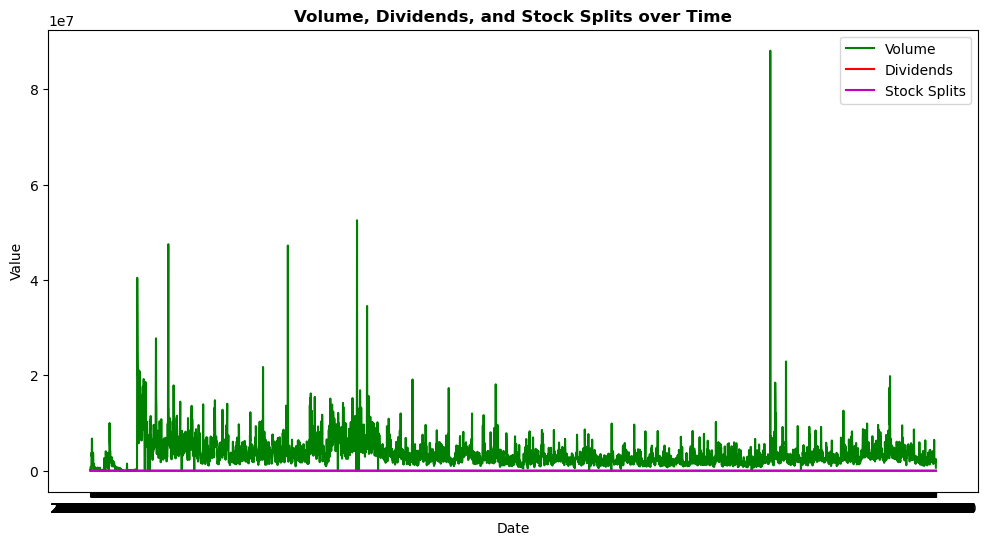

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time', weight="bold")
plt.legend()
plt.show()

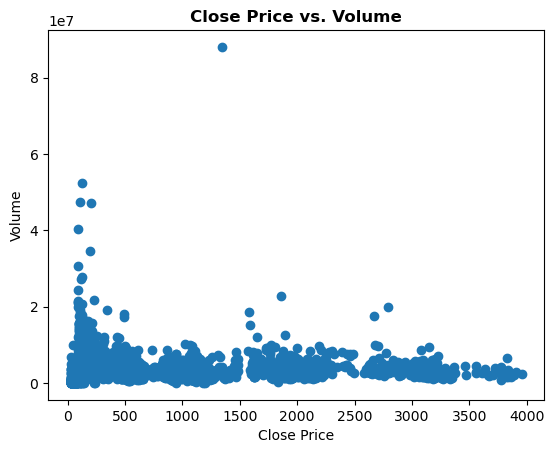

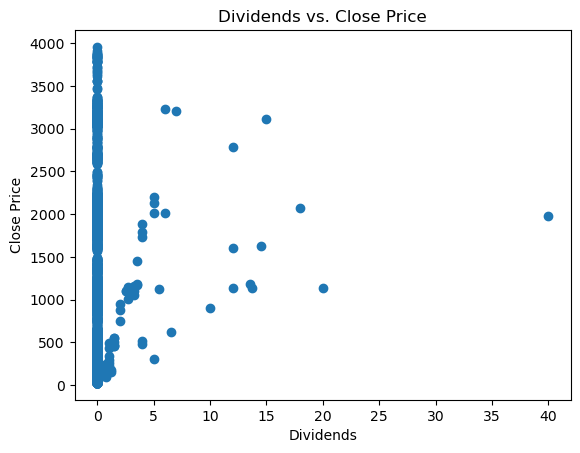

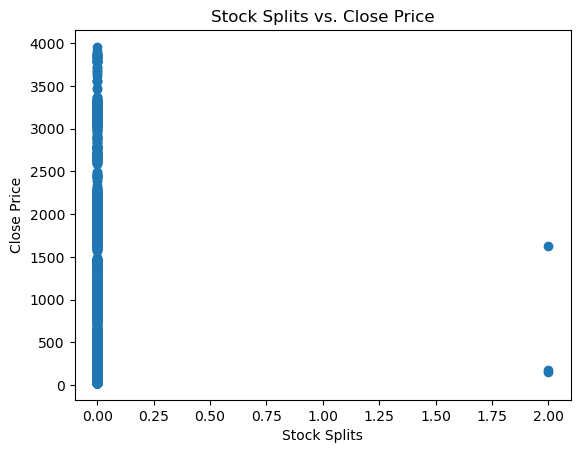

In [61]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

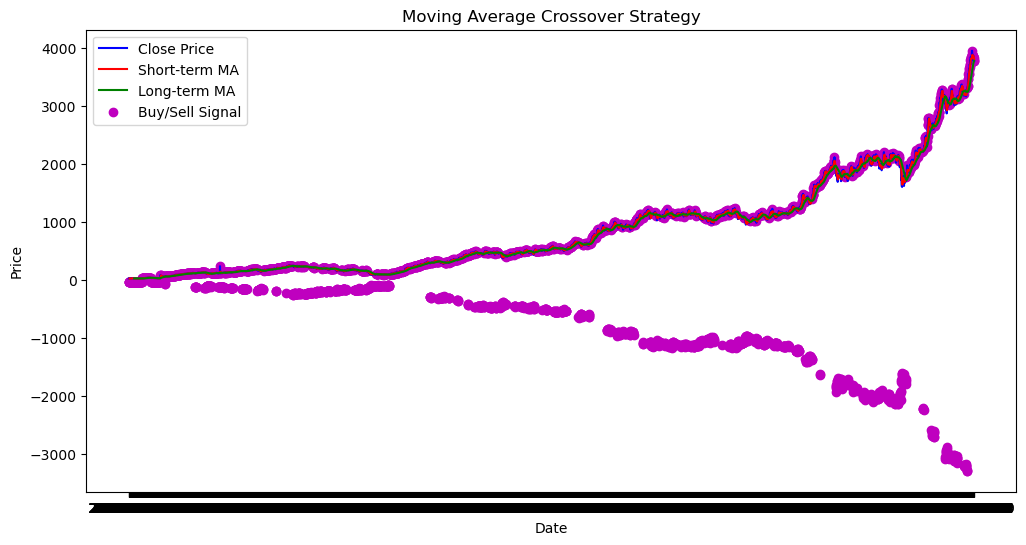

In [63]:
#Moving Average Crossover Strategy


df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',
color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',
color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

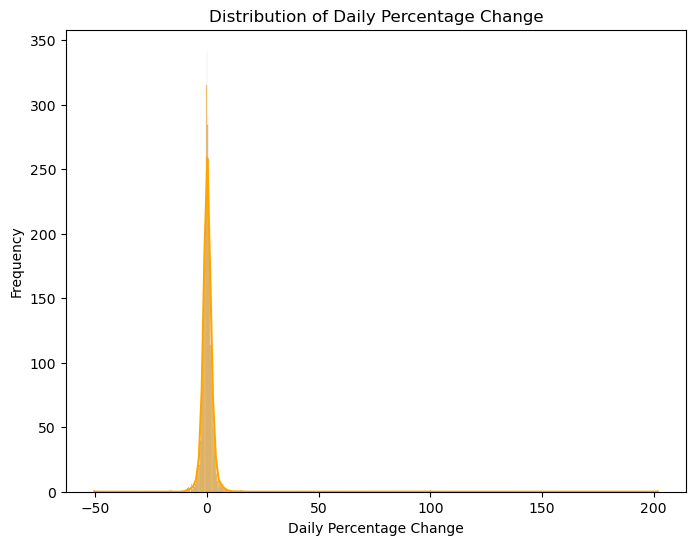

In [64]:
#Daily Price Change

df['Daily_Price_Change'] = df['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [66]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()
df.shape

(4463, 13)

In [67]:
# Data Preparation & Normalization

# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)
#Reshaping Data:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]


In [71]:
!pip install tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached optree-0.15.0-cp312-cp312-win_amd64.whl.metadata (49 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Using cach

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Building a LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm

model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Then your training loop or model.fit(...)


epochs = 30
batch_size = 15

for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]  # assuming you have labels
        model.train_on_batch(X_batch, y_batch) 

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


In [74]:
# Predictions using LSTM

lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


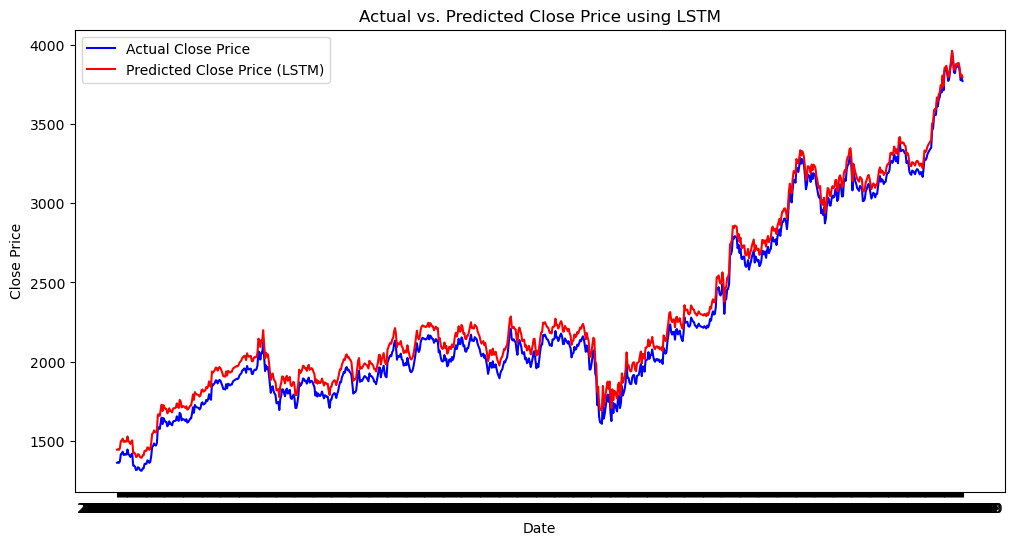

In [76]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
#Visualization of LSTM predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


In [84]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)


lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,
'Predicted_Close': lstm_predictions.flatten()})

predictions_df.to_csv('predictions.csv', index=False)

LSTM Mean Absolute Error: 5.548399254167234e+17
